테스트

In [1]:
#-*- coding:utf-8 -*-

import sys
#reload(sys)

#sys.setdefaultencoding('utf-8')
import requests
import json
import numpy as np
import pandas as pd
from DbConn import *


In [2]:
API_KEY = "ef0d1cc93bc2ef58555e96b5dd6af1e4"

In [2]:
db = DbConn()

import cx_Oracle
import os 
 
os.environ["NLS_LANG"] = "AL32UTF8"
db.connection.encoding

'UTF-8'

In [5]:
# db.connection.encoding
test = db.execute("select * from moviedetail")
#test.head()
test

[(20182082,
  '부탁 하나만 들어줘',
  'A Simple Favor',
  2018,
  116,
  datetime.datetime(2018, 12, 12, 0, 0),
  '개봉',
  '장편',
  '미국',
  '스릴러',
  '폴 페이그',
  '블레이크 라이블리',
  '안나 켄드릭',
  '헨리 골딩',
  '앤드류 라넬스',
  '청소년관람불가',
  20122837,
  '황석희'),
 (20183685,
  '엘리엇과 산타 썰매단',
  'Elliot the Littlest Reindeer',
  2018,
  89,
  datetime.datetime(2018, 12, 12, 0, 0),
  '개봉',
  '장편',
  '캐나다',
  '애니메이션',
  '제니퍼 웨스트콧',
  '최원형',
  '장경희',
  '이동훈',
  '변종필',
  '전체관람가',
  20122837,
  None),
 (20168773,
  '마약왕',
  'The Drug King',
  2017,
  139,
  datetime.datetime(2018, 12, 19, 0, 0),
  '개봉',
  '장편',
  '한국',
  '범죄',
  '우민호',
  '송강호',
  '조정석',
  '배두나',
  '김소진',
  '청소년관람불가',
  2016841,
  '김원국'),
 (20183785,
  '점박이 한반도의 공룡2 : 새로운 낙원',
  None,
  2018,
  93,
  datetime.datetime(2018, 12, 25, 0, 0),
  '개봉',
  '장편',
  '한국',
  '애니메이션',
  '한상호',
  '박희순',
  '라미란',
  '김성균',
  '김경진',
  '전체관람가',
  20112452,
  '임병우'),
 (20178444,
  '극장판 레이디버그: 미라클스톤의 비밀',
  'Miraculous: The Secret of Miracle Stone',
  2017,
  66,
  datetime.

In [ ]:
# ef0d1cc93bc2ef58555e96b5dd6af1e4

In [ ]:
url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/people/searchPeopleList.json?key='+API_KEY+'&peopleNm=%EC%86%A1%EA%B0%95%ED%98%B8'

In [ ]:
req = requests.get(url)
req

In [ ]:
data = req.json()

In [ ]:
data

In [ ]:
data['peopleListResult']

In [ ]:
query = """
INSERT INTO matjip_party 
(title, user_id, cur_member, max_member, member_list, status, end_time) 
VALUES (:title, :user_id, 1, :max_member, :member_list, 1, TO_DATE(:end_time, 'yyyy-MM-dd hh24:mi:ss'))
"""
db.execute(query, {'title' : title, 'user_id': user_id, 'max_member' : max_member, 'member_list' : user_name, 'end_time' : end_time})
            

In [ ]:
movie_list = db.execute("SELECT DISTINCT(moviecd) FROM boxoffice WHERE showrange like '2018%'")

In [ ]:
movie_list

In [ ]:
len(movie_list)

In [ ]:
type(movie_list[0])

In [ ]:
movie_list[0][0]

In [ ]:
avangers = db.execute("select * from boxoffice b join moviedetail m on b.moviecd = m.moviecd where b.moviecd = 20177478 order by b.showrange")

In [ ]:
avangers

In [ ]:
pd.DataFrame(avangers)

In [ ]:
avangers_sql = "select m.* from boxoffice b join moviedetail m on b.moviecd = m.moviecd where b.moviecd = 20177478 order by b.showrange"

In [ ]:
avangers_df = pd.read_sql(avangers_sql, db.connection)

In [ ]:
avangers_df.head()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%lsmagic
plt.style.use("fivethirtyeight")

In [ ]:
sns.pairplot(avangers_df)
plt.show()

In [8]:
test_sql = """
SELECT b.*, m.MOVIENM , m.SHOWTM , m.NATIONS , m.GENRENM , m.DIRECTORS , m.AUDITS , m.COMPANYCD1
FROM MOVIEDETAIL m JOIN (
SELECT MOVIECD , AVG(MRANK) AS mrank, AVG(SALESSHARE) AS salesshare, MAX(SALESACC) AS salesacc, MAX(AUDIACC) as audiacc, SUM(SCRNCNT) AS scrncnt, SUM(SHOWCNT) AS showcnt
FROM BOXOFFICE b2 GROUP BY MOVIECD 
) b ON m.MOVIECD = b.MOVIECD
"""

In [9]:
db = DbConn()
db.connection.encoding




'UTF-8'

In [10]:
test_df = pd.read_sql(test_sql, db.connection)
test_df.head()

,MOVIECD,MRANK,SALESSHARE,SALESACC,AUDIACC,SCRNCNT,SHOWCNT,MOVIENM,SHOWTM,NATIONS,GENRENM,DIRECTORS,AUDITS,COMPANYCD1
0,20182082,6.714286,3.400000,918150738,106315,3059,8172,부탁 하나만 들어줘,116.0,미국,스릴러,폴 페이그,청소년관람불가,20122837
1,20183685,9.200000,1.200000,329593200,45646,1250,1428,엘리엇과 산타 썰매단,89.0,캐나다,애니메이션,제니퍼 웨스트콧,전체관람가,20122837
2,20168773,5.388889,12.644444,16012496702,1839636,12602,43046,마약왕,139.0,한국,범죄,우민호,청소년관람불가,2016841
3,20183785,7.470588,3.305882,4262643350,545789,7485,11877,점박이 한반도의 공룡2 : 새로운 낙원,93.0,한국,애니메이션,한상호,전체관람가,20112452
4,20178444,8.750000,0.775000,197681200,26133,1144,1401,극장판 레이디버그: 미라클스톤의 비밀,66.0,프랑스,애니메이션,토마스 아스트뤽,전체관람가,20000384


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


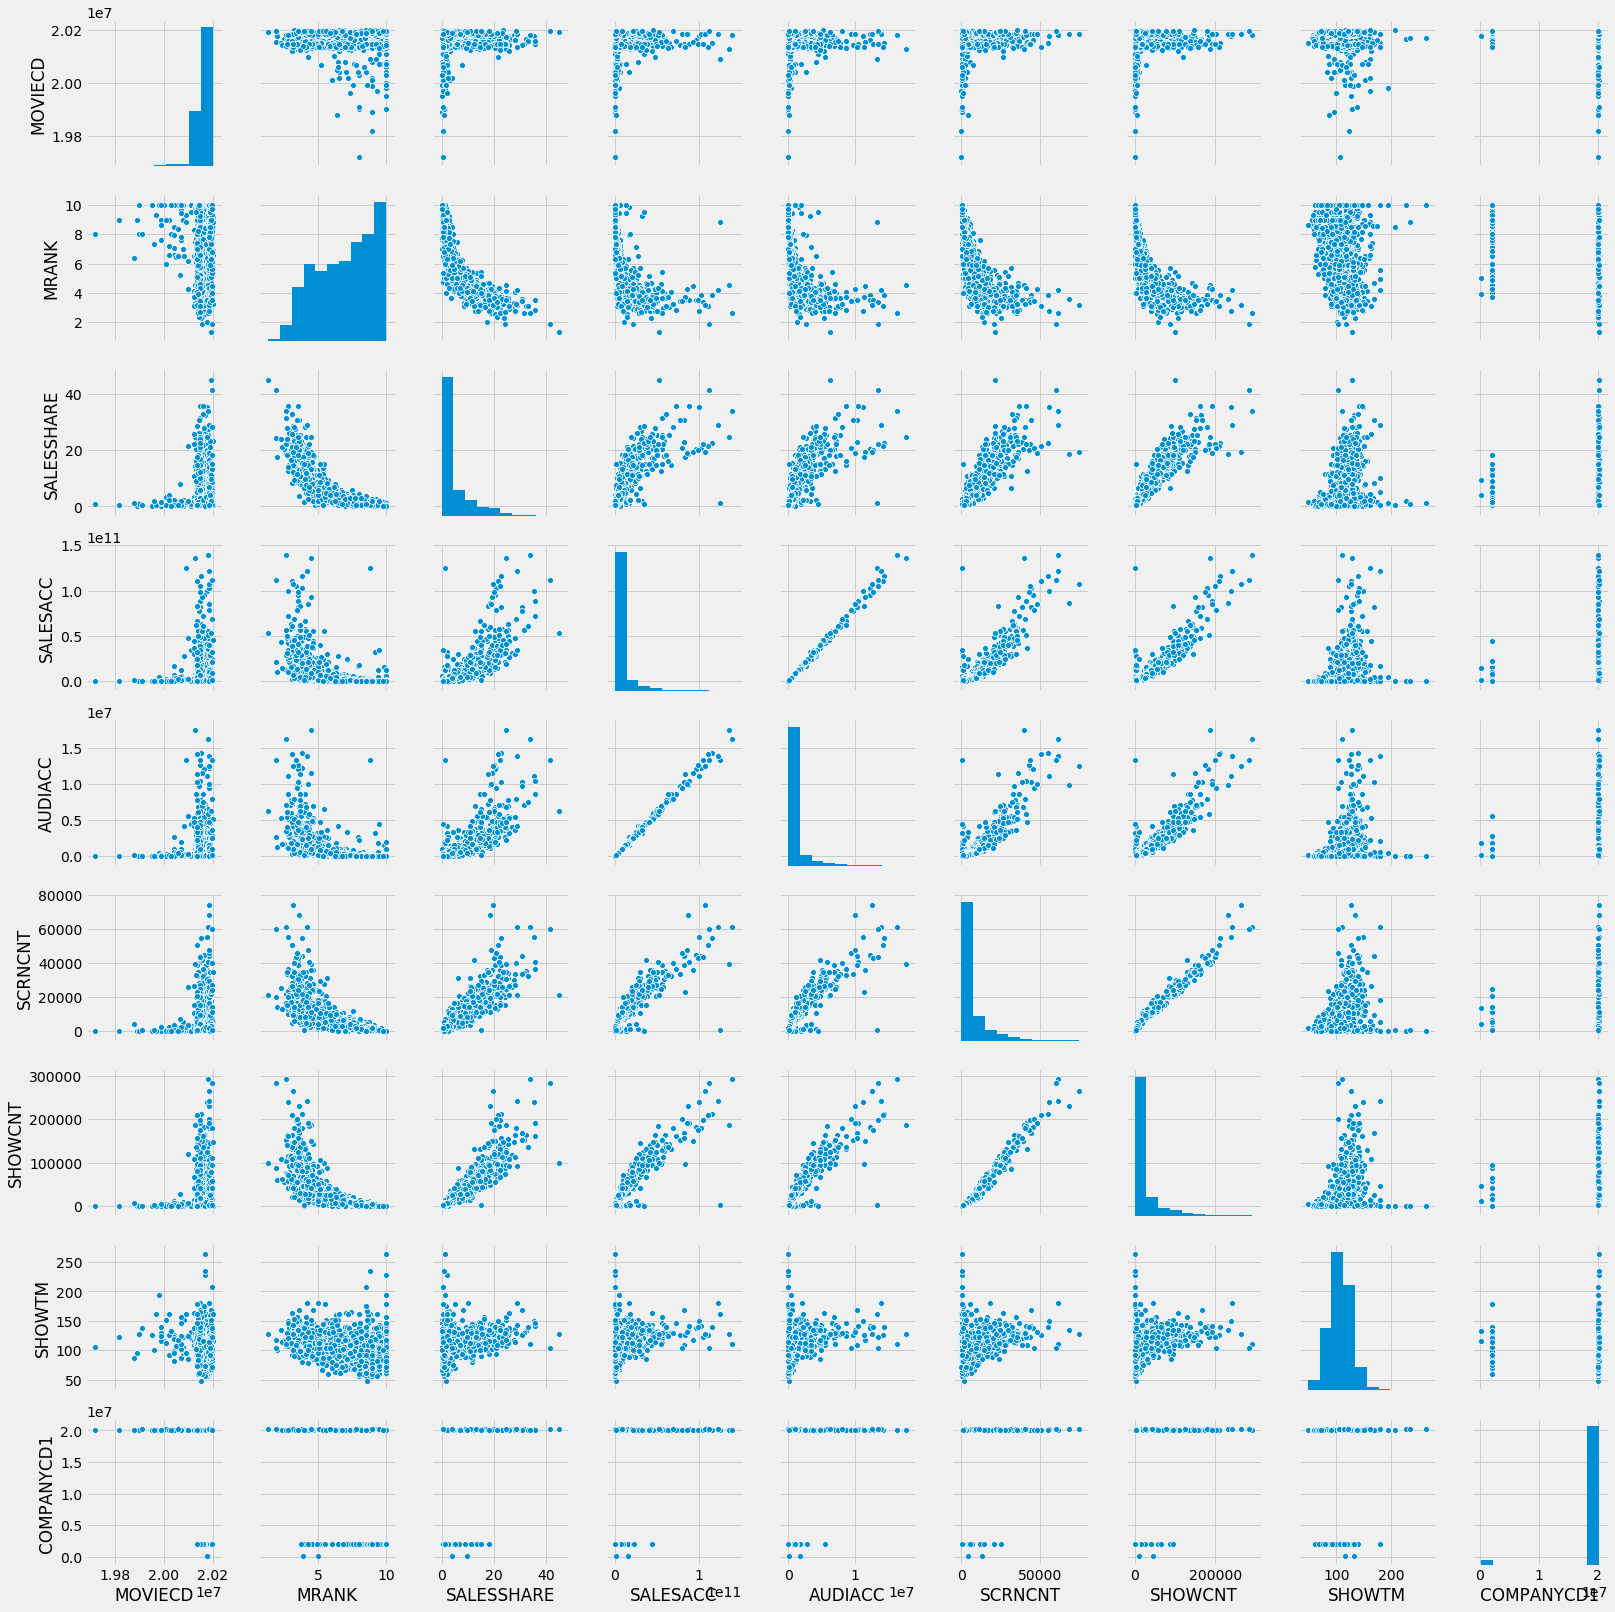

In [14]:
sns.pairplot(test_df)
plt.show()

In [ ]:
db.connection

In [ ]:
db.connection.encoding = 'UTF-8'

1. 정규성을 가지는지 확인 :  t-test
2. 정규성을 가지면 -> 등분산인지 확인 : barttlet

In [17]:
genre_score = {   
    '액션' : 0,
    '드라마' : 0,
    '범죄' : 0,
    '애니메이션' : 0,
    '코미디' : 0,
    '사극' : 0,
    '어드벤처' : 0,
    '멜로/로맨스' : 0,
    '스릴러' : 0,
    '미스터리' : 0,
    '공포(호러)' : 0,
    '판타지' : 0,
    'SF' : 0,
    '다큐멘터리' : 0,
    '전쟁' : 0,
    '뮤지컬' : 0,
}


In [73]:
genre_sql = """
SELECT GENRENM ,COUNT(MOVIECD) AS cnt, ROUND(AVG(MAX_AUDIACC)), SUM(MAX_AUDIACC), MAX(MAX_AUDIACC), MIN(MAX_AUDIACC) 
FROM MOVIEDETAIL m 
WHERE MAX_AUDIACC > 10000000
GROUP BY GENRENM 
ORDER BY cnt DESC 
"""

In [74]:
genre = pd.read_sql(genre_sql, db.connection)
genre

,GENRENM,CNT,ROUND(AVG(MAX_AUDIACC)),SUM(MAX_AUDIACC),MAX(MAX_AUDIACC),MIN(MAX_AUDIACC)
0,액션,6,12202282,73213689,13908898,10482686
1,드라마,4,11957881,47831524,14241429,10065245
2,애니메이션,2,11819744,23639487,13369064,10270423
3,판타지,2,13332980,26665960,14401147,12264813
4,SF,2,11805300,23610600,13326826,10283774
5,사극,1,17583608,17583608,17583608,17583608
6,코미디,1,16252575,16252575,16252575,16252575
7,어드벤처,1,12534560,12534560,12534560,12534560


In [75]:
genre_score

{'SF': 22,
 '공포(호러)': 11,
 '다큐멘터리': 5,
 '드라마': 144,
 '멜로/로맨스': 25,
 '뮤지컬': 2,
 '미스터리': 23,
 '범죄': 90,
 '사극': 51,
 '스릴러': 17,
 '애니메이션': 68,
 '액션': 315,
 '어드벤처': 44,
 '전쟁': 8,
 '코미디': 53,
 '판타지': 29}

In [76]:
for i, g in genre.iterrows():
    genre_score[g['GENRENM']] = genre_score[g['GENRENM']] + int(g['CNT'])

In [77]:
genre_score

{'SF': 24,
 '공포(호러)': 11,
 '다큐멘터리': 5,
 '드라마': 148,
 '멜로/로맨스': 25,
 '뮤지컬': 2,
 '미스터리': 23,
 '범죄': 90,
 '사극': 52,
 '스릴러': 17,
 '애니메이션': 70,
 '액션': 321,
 '어드벤처': 45,
 '전쟁': 8,
 '코미디': 54,
 '판타지': 31}

In [ ]:
{
    'SF': 24,
    '공포(호러)': 11,
    '다큐멘터리': 5,
    '드라마': 148,
    '멜로/로맨스': 25,
    '뮤지컬': 2,
    '미스터리': 23,
    '범죄': 90,
    '사극': 52,
    '스릴러': 17,
    '애니메이션': 70,
    '액션': 321,
    '어드벤처': 45,
    '전쟁': 8,
    '코미디': 54,
    '판타지': 31
}

In [2]:
db = DbConn()

In [7]:
directors = pd.read_sql("""
SELECT DIRECTOR, COUNT(*), MAX(MAX_AUDIACC), ROUND(AVG(MAX_AUDIACC),0) 
FROM MOVIE2 
WHERE DIRECTOR IS NOT NULL 
GROUP BY DIRECTOR
""", db.connection)

In [8]:
directors.head()

,DIRECTOR,COUNT(*),MAX(MAX_AUDIACC),"ROUND(AVG(MAX_AUDIACC),0)"
0,펠릭스 반 그뢰닝엔,1,4917,4917
1,프랭키 첸,2,424479,409955
2,엄유나,1,2853913,2853913
3,시즈노 코분,7,625448,442015
4,크리스 벅,3,13369064,7966817
